# K-Means Clustering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import os
path=r'C:\Users\ANIL\Desktop\python\K Means\archive (11)'
os.chdir(path)

In [4]:
dataset=pd.read_csv('churn-bigml-20.csv')
dataset.head(30)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
5,AK,36,408,No,Yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,False
6,MI,65,415,No,No,0,211.3,120,35.92,162.6,122,13.82,134.7,118,6.06,13.2,5,3.56,3,False
7,ID,119,415,No,No,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True
8,VA,10,408,No,No,0,186.1,112,31.64,190.2,66,16.17,282.8,57,12.73,11.4,6,3.08,2,False
9,WI,68,415,No,No,0,148.8,70,25.30,246.5,164,20.95,129.8,103,5.84,12.1,3,3.27,3,False


In [6]:
dataset.drop(['Churn'],axis=1)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1


In [7]:
dataset.shape

(667, 20)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [10]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
def StrToFloat(x):
 dataset[x]=label_encoder.fit_transform(dataset[x])
 dataset[x].unique()
for i in dataset.columns:
 StrToFloat(i)

In [11]:
dataset.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [12]:
dataset.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

array([[<AxesSubplot:title={'center':'State'}>,
        <AxesSubplot:title={'center':'Account length'}>,
        <AxesSubplot:title={'center':'Area code'}>,
        <AxesSubplot:title={'center':'International plan'}>],
       [<AxesSubplot:title={'center':'Voice mail plan'}>,
        <AxesSubplot:title={'center':'Number vmail messages'}>,
        <AxesSubplot:title={'center':'Total day minutes'}>,
        <AxesSubplot:title={'center':'Total day calls'}>],
       [<AxesSubplot:title={'center':'Total day charge'}>,
        <AxesSubplot:title={'center':'Total eve minutes'}>,
        <AxesSubplot:title={'center':'Total eve calls'}>,
        <AxesSubplot:title={'center':'Total eve charge'}>],
       [<AxesSubplot:title={'center':'Total night minutes'}>,
        <AxesSubplot:title={'center':'Total night calls'}>,
        <AxesSubplot:title={'center':'Total night charge'}>,
        <AxesSubplot:title={'center':'Total intl minutes'}>],
       [<AxesSubplot:title={'center':'Total intl calls'}>,

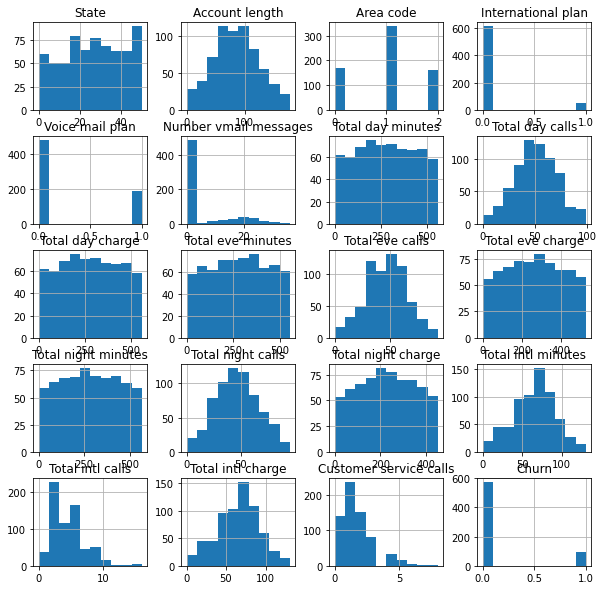

In [13]:
dataset.hist(figsize=(10,10))

In [22]:
X = dataset.iloc[:, [0,1]].values

In [14]:
dataset

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,18,100,0,0,0,0,303,47,303,555,26,526,346,36,275,50,4,50,1,0
1,15,48,1,0,0,0,104,87,104,385,29,360,320,57,254,90,6,90,4,1
2,34,143,1,0,0,0,560,17,560,549,43,520,132,74,112,18,9,18,4,1
3,40,94,1,0,0,0,62,53,62,55,48,54,236,51,192,40,6,40,2,0
4,11,32,2,0,0,0,83,67,83,336,55,315,196,36,159,74,1,74,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,48,97,1,0,1,15,124,38,124,94,71,92,466,40,366,78,7,78,2,0
663,1,89,0,0,1,18,29,81,29,286,77,268,406,19,322,44,3,44,1,0
664,46,43,1,0,0,0,335,68,335,9,56,9,326,80,258,95,8,95,3,0
665,49,141,1,0,0,0,244,64,244,258,51,242,254,28,206,79,4,79,1,0


## Using the elbow method to find the optimal number of clusters

C:\Users\ANIL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


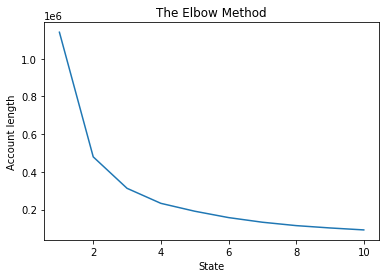

In [35]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('State')
plt.ylabel('Account length')
plt.show()

In [36]:
km = KMeans(n_clusters =4, n_jobs = 50, random_state=21)
km.fit(X)

C:\Users\ANIL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=50, random_state=21)

In [37]:
centers = km.cluster_centers_
print(centers)

[[ 26.6        103.3255814 ]
 [ 28.41964286 145.46428571]
 [ 23.90566038  69.0990566 ]
 [ 27.140625    31.171875  ]]


In [38]:
kmeans5 = KMeans(n_clusters=4)
y_kmeans5 = kmeans5.fit_predict(X)
print(y_kmeans5)

kmeans5.cluster_centers_

[3 0 1 3 0 0 0 3 0 2 2 2 0 3 1 2 2 3 2 0 3 0 2 2 3 3 3 0 0 0 0 0 0 3 2 1 3
 2 0 0 0 3 1 2 3 2 3 2 2 1 0 2 1 1 2 1 2 1 2 2 3 3 3 3 2 0 3 1 2 3 2 0 0 2
 2 2 0 2 3 3 3 3 2 2 2 2 2 1 0 3 1 2 3 3 2 2 0 3 2 3 2 0 2 2 2 1 1 0 2 2 2
 1 2 2 0 2 3 2 0 0 0 3 2 3 1 2 3 1 3 2 1 0 2 0 3 0 0 0 0 3 0 3 3 3 3 1 0 2
 2 1 1 0 2 1 3 3 0 2 1 2 2 3 0 1 3 1 0 3 2 0 2 3 2 1 1 2 2 1 2 3 3 3 2 3 3
 3 1 2 2 0 0 2 2 0 1 2 3 1 3 2 3 0 0 3 0 0 3 0 0 3 3 0 0 1 3 3 3 2 1 1 2 3
 3 0 0 3 2 2 2 3 2 2 2 3 0 3 3 3 2 1 1 3 3 1 1 3 0 3 2 3 3 0 3 2 2 0 1 3 2
 2 3 2 2 0 1 0 0 3 2 2 2 2 0 2 1 3 0 1 0 0 2 2 1 3 0 2 0 3 2 0 2 1 2 0 0 1
 3 3 3 2 1 2 1 0 2 3 0 2 3 3 3 2 2 0 1 3 2 1 0 3 2 3 2 2 3 2 0 3 2 2 0 1 3
 2 0 2 3 2 2 3 2 3 2 1 2 0 3 2 1 2 3 0 2 1 3 2 2 3 3 2 2 3 2 2 3 3 3 3 0 3
 2 1 3 3 3 0 3 2 2 3 3 3 3 3 2 2 1 3 3 3 2 3 2 3 2 2 1 1 2 3 2 3 3 2 3 2 2
 2 3 3 0 3 3 0 1 2 3 2 0 2 2 2 2 3 3 2 3 3 2 3 0 3 2 3 3 3 3 0 0 1 0 2 0 1
 2 3 3 3 0 1 1 0 3 0 2 2 1 2 1 3 3 3 2 0 3 0 2 3 3 3 0 3 3 1 3 2 1 1 1 2 0
 3 3 1 1 1 2 1 0 0 3 2 2 

array([[ 26.48780488,  30.36585366],
       [ 28.41964286, 145.46428571],
       [ 24.50934579,  68.42523364],
       [ 26.41284404, 103.10091743]])

## Training the K-Means model on the dataset

In [39]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

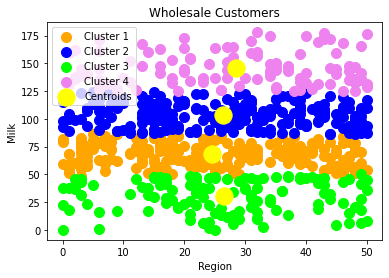

In [40]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'orange', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'lime', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'violet', label = 'Cluster 4')



plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Wholesale Customers')
plt.xlabel('Region')
plt.ylabel('Milk')
plt.legend()
plt.show()